In [1]:
# lecture 10 slide 7
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
# reproduceability
tf.set_random_seed(777)
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# input placeholder
X = tf.placeholder(tf.float32, [None,784])
Y = tf.placeholder(tf.float32,[None,10])

In [4]:
W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(X,W) + b

In [5]:
# define parameters

learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples/batch_size)

In [6]:
# define cost/loss & optimizer

In [7]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels =Y))
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [8]:
cost = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(
            logits = hypothesis, labels = tf.stop_gradient(Y)
    )
)

In [9]:
correct_prediction = tf.equal(tf.argmax(hypothesis,axis = 1), tf.argmax(Y, axis = 1))

In [10]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

Epoch: 0001 cost = 5.743060071
Epoch: 0002 cost = 1.773943864
Epoch: 0003 cost = 1.119321038
Epoch: 0004 cost = 0.868712265
Epoch: 0005 cost = 0.736231768
Epoch: 0006 cost = 0.652670781
Epoch: 0007 cost = 0.594188317
Epoch: 0008 cost = 0.550967683
Epoch: 0009 cost = 0.516835602
Epoch: 0010 cost = 0.489964912
Epoch: 0011 cost = 0.467128218
Epoch: 0012 cost = 0.448298602
Epoch: 0013 cost = 0.432575236
Epoch: 0014 cost = 0.417959033
Epoch: 0015 cost = 0.405480357
Epoch: 0016 cost = 0.394785488
Epoch: 0017 cost = 0.385329806
Epoch: 0018 cost = 0.376084003
Epoch: 0019 cost = 0.368119199
Epoch: 0020 cost = 0.361015388
Epoch: 0021 cost = 0.354496846
Epoch: 0022 cost = 0.348092492
Epoch: 0023 cost = 0.342500602
Epoch: 0024 cost = 0.337264904
Epoch: 0025 cost = 0.332164492
Epoch: 0026 cost = 0.327897823
Epoch: 0027 cost = 0.323723156
Epoch: 0028 cost = 0.319248884
Epoch: 0029 cost = 0.315582290
Epoch: 0030 cost = 0.312147272
Epoch: 0031 cost = 0.309228776
Epoch: 0032 cost = 0.305559514
Epoch: 0

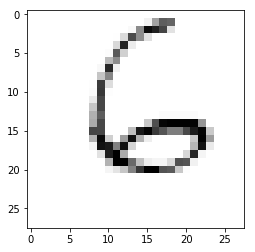

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for iteration in range(num_iterations):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            _,cost_val = sess.run([train,cost],feed_dict = {X:batch_xs,Y:batch_ys})
            avg_cost += cost_val/num_iterations
        print('Epoch:','%04d' % (epoch +1), 'cost =', '{:.9f}'.format(avg_cost))
    print('learning finished')
    print(
        'accuracy',sess.run(accuracy,feed_dict = {X:mnist.test.images,Y:mnist.test.labels}))
    r = random.randint(0,mnist.test.num_examples -1)
    print('label:',sess.run(tf.argmax(mnist.test.labels[r:r+1],axis = 1)))
    print(
    'prediction:',sess.run(tf.argmax(hypothesis,axis =1),feed_dict = {X:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap ='Greys',interpolation='nearest')
    plt.show()